In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df=pd.read_csv("F:\Analytics\Learnings\Python\Pratice data\Mall_Customers.csv")
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Feature engineering 

In [3]:
x= df.drop(["CustomerID","Genre","Age"],axis=1)

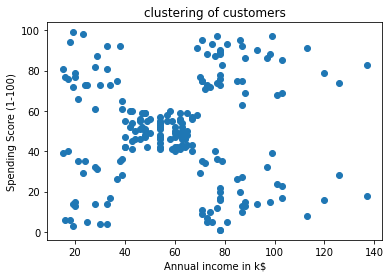

In [4]:
# Visualize the data set

plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'])
plt.xlabel('Annual income in k$')
plt.ylabel('Spending Score (1-100)')
plt.title('clustering of customers')
plt.show()

# Elbow Chart and Silhouette Score

For n_clusters = 2, silhouette score is 0.2968969162503008)
For n_clusters = 3, silhouette score is 0.46761358158775435)
For n_clusters = 4, silhouette score is 0.4931963109249047)
For n_clusters = 5, silhouette score is 0.553931997444648)
For n_clusters = 6, silhouette score is 0.53976103063432)
For n_clusters = 7, silhouette score is 0.5264283703685728)
For n_clusters = 8, silhouette score is 0.4531650787816753)
For n_clusters = 9, silhouette score is 0.45872989167156364)


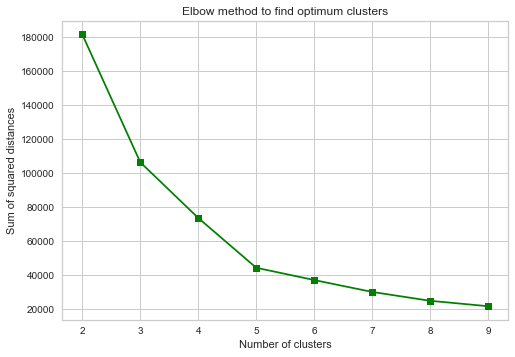

In [20]:
# Chossing the number of clusters


wcs= []


for i in range(2,10):
    k=KMeans(n_clusters=i)
    k.fit(x)
    preds = k.predict(x)
    wcs_iter= k.inertia_
    wcs.append(wcs_iter)    
    score = silhouette_score(x,preds)
    print("For n_clusters = {}, silhouette score is {})".format(i, score))
    
    
plt.plot(range(2,10),wcs,marker='s',color='green')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method to find optimum clusters')
plt.show()

# Silhouette Chart

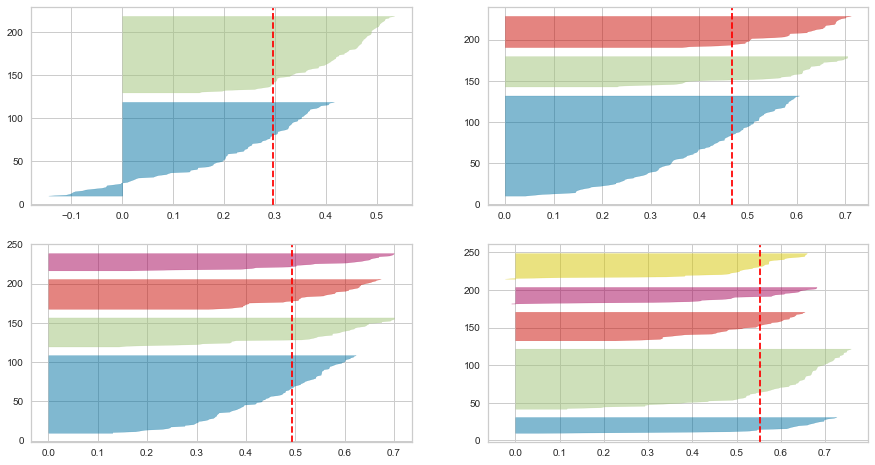

In [14]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x) 

# Modelling with Optimum clusters 

In [15]:
# Modelling using Kmeans

from sklearn.cluster import KMeans
k=KMeans(n_clusters=5)
k.fit(x)

KMeans(n_clusters=5)

In [16]:
pred=k.predict(x)

In [17]:
x= df.drop(["CustomerID","Genre","Age"],axis=1).values  # .values as graphs takes only arrays, not dataframe

# Final Cluster chart

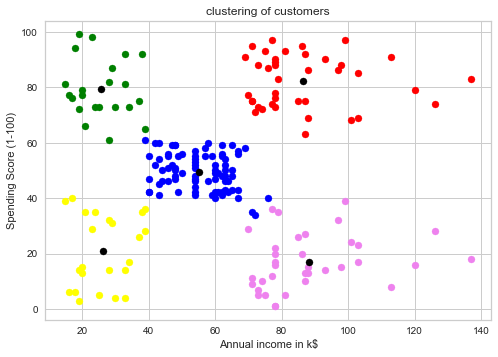

In [18]:
plt.scatter(x[pred==0,0],x[pred==0,1],color='red',label='1st cluster')
plt.scatter(x[pred==1,0],x[pred==1,1],color='green',label='2nd cluster')
plt.scatter(x[pred==2,0],x[pred==2,1],color='blue',label='3rd cluster')
plt.scatter(x[pred==3,0],x[pred==3,1],color='yellow',label='4th cluster')
plt.scatter(x[pred==4,0],x[pred==4,1],color='violet',label='5th cluster')

plt.scatter(k.cluster_centers_[:,0],k.cluster_centers_[:,1],color='black',label='Centroid', s=50)

plt.title('clustering of customers')
plt.xlabel('Annual income in k$')
plt.ylabel('Spending Score (1-100)')
plt.show()